<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/novel92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.4-py3-none-any.whl size=111926 sha256=613adce393e4b87a12eef125a51374c1e1b9b62ec2863dcce148482d206af2ff
  Stored in directory: /root/.cache/pip/wheels/96/ea/6e/1ef402d5911f0536091cd6d9357682c64214efa960eab358b4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [10]:
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           8008        196  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          14100        254  1.0              
najeebz/electronic-card-transactions-dec-2023-new-zealand          Electronic Card Transactions 2000-2023             127KB  2024-01-24 02:48:11            937         24  1.0              
asaniczka/video-game-sales-2024                   

In [11]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

 85% 9.00M/10.6M [00:00<00:00, 86.5MB/s]
100% 10.6M/10.6M [00:00<00:00, 96.8MB/s]


In [12]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [13]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

**Load** **Dataset**

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
#dataset_path = '/content/SB-FishDisease'

# Define image dimensions and batch size
IMAGE_SIZE = 256
BATCH_SIZE = 20

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [15]:
print(len(dataset))

23


In [16]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(20, 256, 256, 3)
[3 2 4 1 0 4 4 2 6 4 3 4 3 4 5 4 2 2 4 0]
(256, 256, 3)


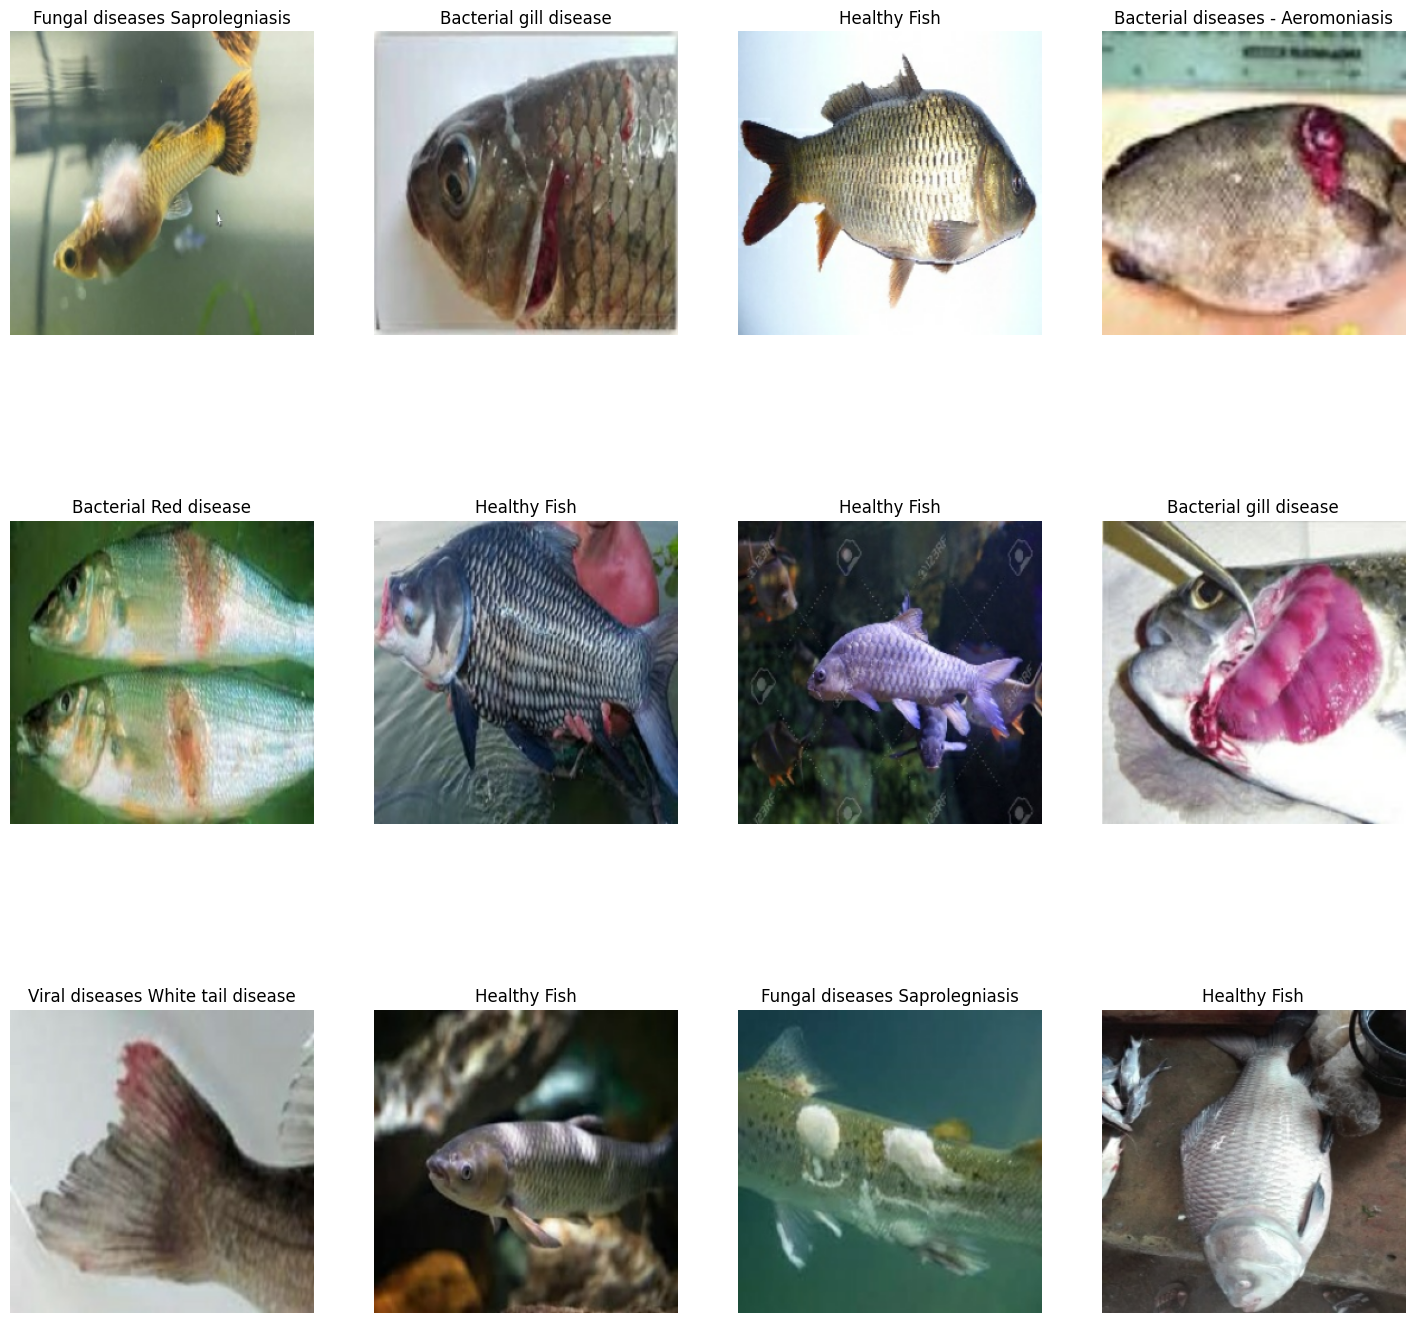

In [17]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [18]:
train_size=0.7
val_size=0.15
len(dataset)*train_size

16.099999999999998

In [19]:
train_ds=dataset.take(int(len(dataset)*train_size))

In [20]:
len(train_ds)

16

In [21]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)


7

In [22]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

2

In [23]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

5

In [24]:
#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))

In [25]:
import tensorflow as tf
from tensorflow.keras import layers

# Assuming 'train_ds' is your training dataset

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    # Add more augmentations as needed
])

# Apply data augmentation to your training dataset
normalized_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
16/16 [==============================] - 8s 70ms/step - loss: 1.8546 - accuracy: 0.3031 - val_loss: 1.5851 - val_accuracy: 0.5250
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 1.7699 - accuracy: 0.4000 - val_loss: 1.5448 - val_accuracy: 0.5250
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 1.7590 - accuracy: 0.4000 - val_loss: 1.5551 - val_accuracy: 0.5250
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 1.7505 - accuracy: 0.4000 - val_loss: 1.5591 - val_accuracy: 0.5250
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 1.7301 - accuracy: 0.4000 - val_loss: 1.5035 - val_accuracy: 0.5250
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 1.6940 - accuracy: 0.4000 - val_loss: 1.4909 - val_accuracy: 0.5250
Epoch 7/100
16/16 [==============================] - 1s 60ms/step - loss: 1.6895 - accuracy: 0.4000 - val_loss: 1.5449 - val_accuracy: 0.5250
Epoch 

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)       

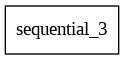

In [45]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          expand_nested=True)

In [46]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()
    except:
      pass

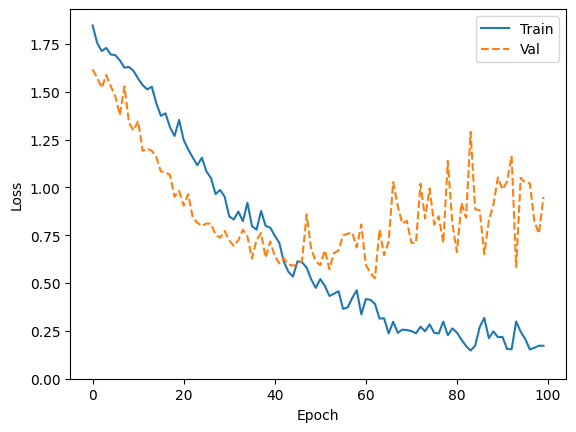

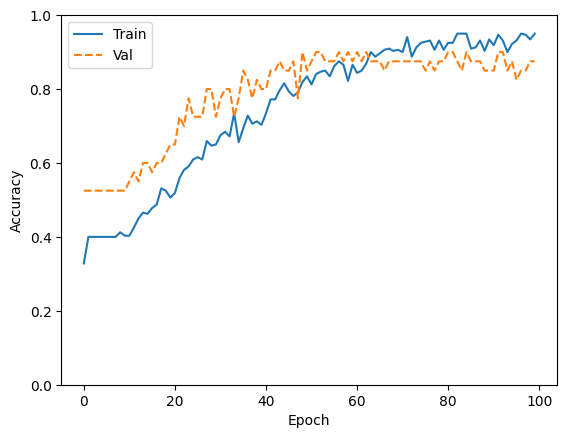

In [47]:
plot_metrics(hist)

In [48]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [49]:
def list_files(dir,full_dir):
    r = []
    r1 = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            rr = os.path.join(root, name)
            r.append(rr)
    dd = {'local_path':r}
    df = pd.DataFrame(dd)
    return df

def proccess(img1):
  img = tf.keras.preprocessing.image.load_img(
      img1, target_size=(IMAGE_SIZE, IMAGE_SIZE)
  )
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  pred = class_names[np.argmax(score)]
  score1 = 100 * np.max(score)

  return pred, score1

def new_col(col):
    if col['Pred'] == 'yes' and col['Actual'] == 'yes':
        return 1
    elif col['Pred'] == 'no' and col['Actual'] == 'no':
      return 1
    else:
      return 0


def proccess1(df):
  aa = []
  bb = []
  cc = []

  for a,b in df.iterrows():
    img = b['local_path']
    pred, value = proccess(img)
    pat = b['local_path']

    val = pat.split('/')[4]

    aa.append(pred)
    bb.append(value)
    cc.append(val)
  vals = {"Pred":aa,"Accurarcy":bb,'Actual':cc}
  df_test1 = pd.DataFrame(vals)
  df_test1 = pd.concat([df,df_test1], axis=1)

  df_test1['Check'] = df_test1.apply(lambda col: new_col (col),axis=1)

  return df_test1

TypeError: path should be path-like or io.BytesIO, not <class 'tuple'>

In [ ]:
import pandas as pd

# Example DataFrame structure
test_ds = pd.DataFrame({
    'Actual1': ['Bacterial Red disease','Bacterial diseases - Aeromoniasis','Bacterial gill disease','Fungal diseases Saprolegniasis','Healthy Fish','Parasitic diseases','Viral diseases White tail disease'],
    'Pred1': ['Bacterial Red disease','Bacterial diseases - Aeromoniasis','Bacterial gill disease','Fungal diseases Saprolegniasis','Healthy Fish','Parasitic diseases','Viral diseases White tail disease']
})


In [ ]:
true_labels = test_ds['Actual1'].to_numpy()
predicted_labels = test_ds['Pred1'].to_numpy()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# List of class names
class_names = test_ds['Actual1'].unique()

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation=50, ax=ax)
plt.show()
